In [1]:
# import python modules & Zernike Decomposition modules

import numpy as np
import matplotlib.pyplot as plt
from zernike_decomposition import *
%matplotlib inline

### compute the number of zernike coefficients using 'zernike_num_coeff(n)' function

** We compute the number of coefficients for the 1st $50$ radial order.

In [5]:
# radial_order = 
print 'Radial Order(n) ','\t' 'Num. of Coefficients(N)'
print '------------- ','\t \t' '-------------------'

for n in xrange(51):
    
    print '%d' %n, '\t \t \t', zernike_num_coeff(n)

Radial Order(n)  	Num. of Coefficients(N)
-------------  	 	-------------------
0 	 	 	1
1 	 	 	3
2 	 	 	6
3 	 	 	10
4 	 	 	15
5 	 	 	21
6 	 	 	28
7 	 	 	36
8 	 	 	45
9 	 	 	55
10 	 	 	66
11 	 	 	78
12 	 	 	91
13 	 	 	105
14 	 	 	120
15 	 	 	136
16 	 	 	153
17 	 	 	171
18 	 	 	190
19 	 	 	210
20 	 	 	231
21 	 	 	253
22 	 	 	276
23 	 	 	300
24 	 	 	325
25 	 	 	351
26 	 	 	378
27 	 	 	406
28 	 	 	435
29 	 	 	465
30 	 	 	496
31 	 	 	528
32 	 	 	561
33 	 	 	595
34 	 	 	630
35 	 	 	666
36 	 	 	703
37 	 	 	741
38 	 	 	780
39 	 	 	820
40 	 	 	861
41 	 	 	903
42 	 	 	946
43 	 	 	990
44 	 	 	1035
45 	 	 	1081
46 	 	 	1128
47 	 	 	1176
48 	 	 	1225
49 	 	 	1275
50 	 	 	1326


### Generate the basis of Zernike polynomials (i.e. in pyramid form) & corresponding radial polynomial

In [2]:
def circular_gridmask(data):
    """Generate a grid mask"""
    
    ny, nx = data.shape
    c = ny/2-1
    ix, iy = np.meshgrid(np.arange(nx), np.arange(ny))
    distance = np.sqrt((ix - c)**2 + (iy - c)**2)
    data[distance>c] = np.nan
    
    return data

def plot_zernikepyramid(norder, nside=128, figsize=(20, 20), fontsize=20, colorbar_labelsize=10):
    """Generate the basis of zernike polynomial in a pyramid form"""
    
    n,m = zernike_Double_Index(nlevels=norder)
    # Generate (rho, phi) grids and masking grid
    grid_rho, grid_phi, grid_mask = unit_disk(imgSize=nside)
    if norder == 0:
        basis=zernike_poly(m, n, grid_rho, grid_phi)*grid_mask
#         print np.array(basis).shape
        basis = np.array(circular_gridmask(np.array(basis)))
    else:
        basis=[zernike_poly(i, j, grid_rho, grid_phi)*grid_mask for i,j in zip(m,n)]
        basis = np.array([circular_gridmask(iter) for iter in basis])
    zernike_visuo__pyramid(basis, n, m, norder, 
                           figsize=figsize, cmap='jet',fontsize=fontsize, 
                           colorbar_labelsize=colorbar_labelsize)
    
def gen_radialpoly(norder, nside=128, legend_ncol=3):
    """Generate Zernike radial polynomial plot"""

    n,m = zernike_Double_Index(nlevels=norder)
    grid_rho = unit_disk(imgSize=nside)[0]
    rad = grid_rho[grid_rho<=1]

    if norder == 0:
        zrad = zernike_rad(m, n, rad)
#         print zrad.shape
        plt.plot(rad.ravel(), zrad.ravel(), label=r'$R_{%d%d}$' %(n, m))

    else:
        rad_poly = []
        for iter in xrange(len(n)):
            zrad = zernike_rad(m[iter], n[iter], rad)
            rad_poly.append(zrad)
        for i in range(len(n)): plt.plot(rad.ravel(), (np.array(rad_poly)[i]).ravel(), label=r'$R_{%d}^{%d}$' %(n[i], m[i]))

    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
                ncol=legend_ncol, fancybox=True, shadow=True, framealpha = 0.5)
    plt.xlabel(r'r value')
    plt.ylabel(r'radial polynomial value')

# valid locations are:
# right
# center left
# upper right
# lower right
# best
# center
# lower left
# center right
# upper left
# upper center
# lower center

** Eg1: For radial order 0, we produce 1 basis polynomial::

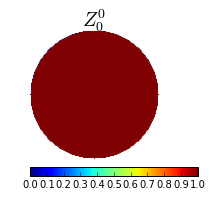

In [25]:
plot_zernikepyramid(norder=0, nside=128, figsize=(3, 3))


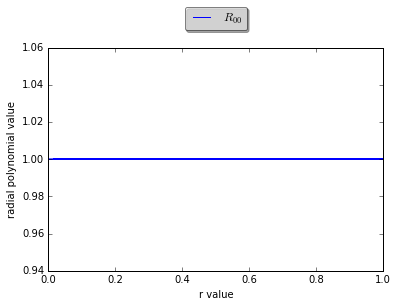

In [27]:
gen_radialpoly(norder=0, nside=128)

** Eg2: For radial order 1, we produce 3 bases::

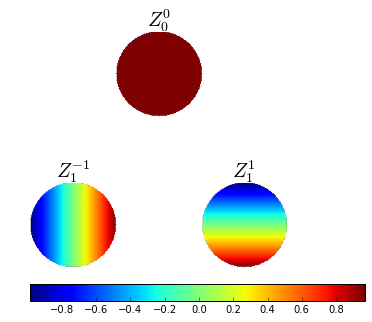

In [28]:
plot_zernikepyramid(norder=1, nside=128, figsize=(6, 6))

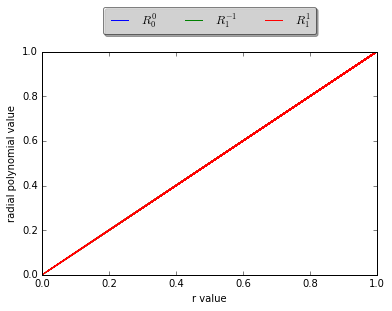

In [30]:
gen_radialpoly(norder=1, nside=128)

** Eg3: For radial order 3, we produce 10 bases::

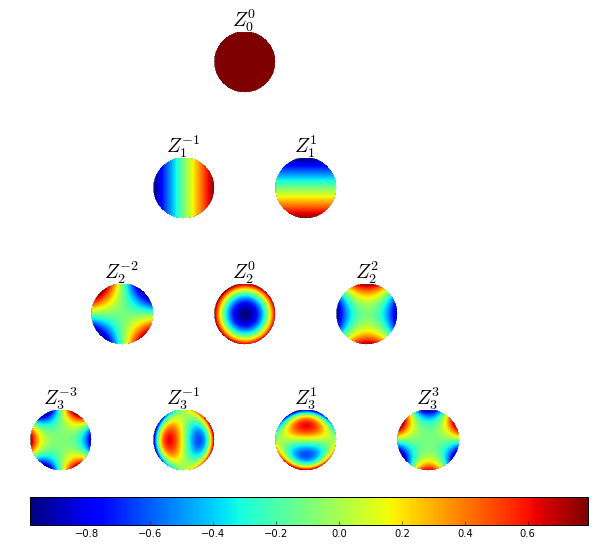

In [31]:
plot_zernikepyramid(norder=3, nside=128, figsize=(10, 10))

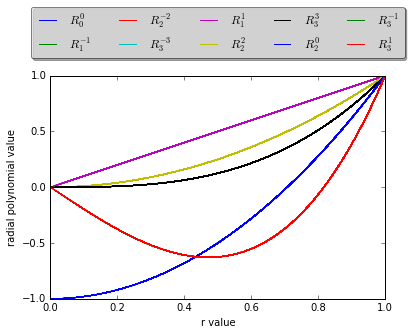

In [34]:
gen_radialpoly(norder=3, nside=128, legend_ncol=5)

** Eg4: For radial order 6, we produce 28 bases::

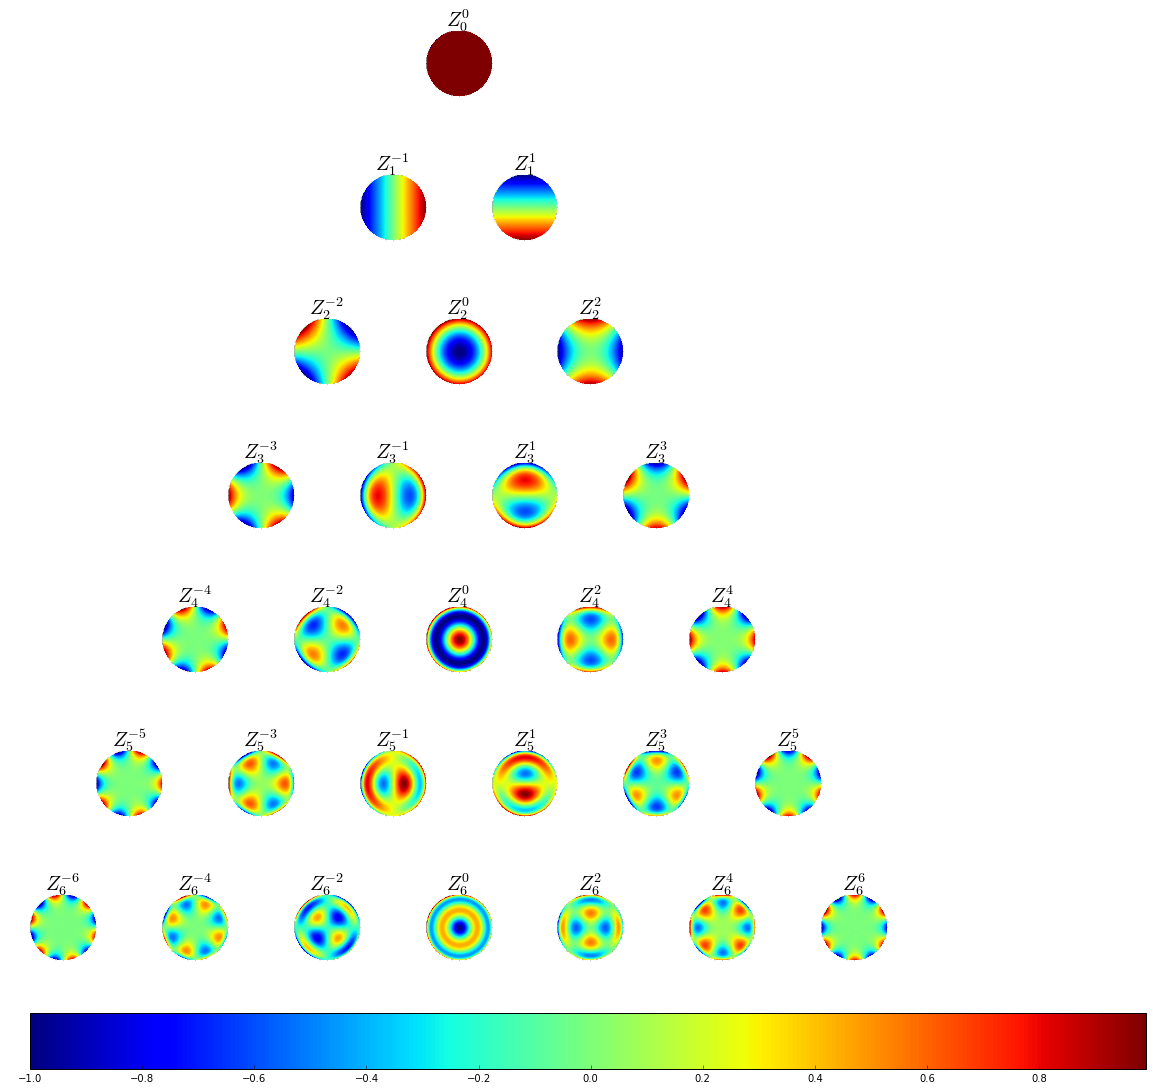

In [43]:
plot_zernikepyramid(norder=6, nside=128, figsize=(20, 20))

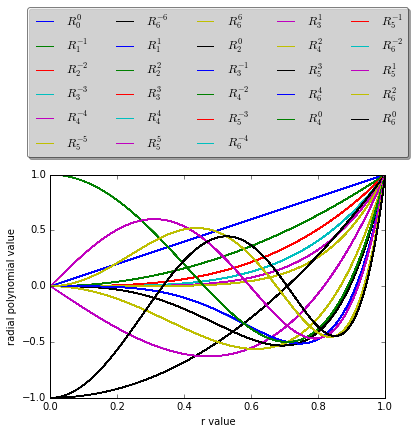

In [36]:
gen_radialpoly(norder=6, nside=128, legend_ncol=5)

** Eg5: For radial order 10, we produce 66 bases::

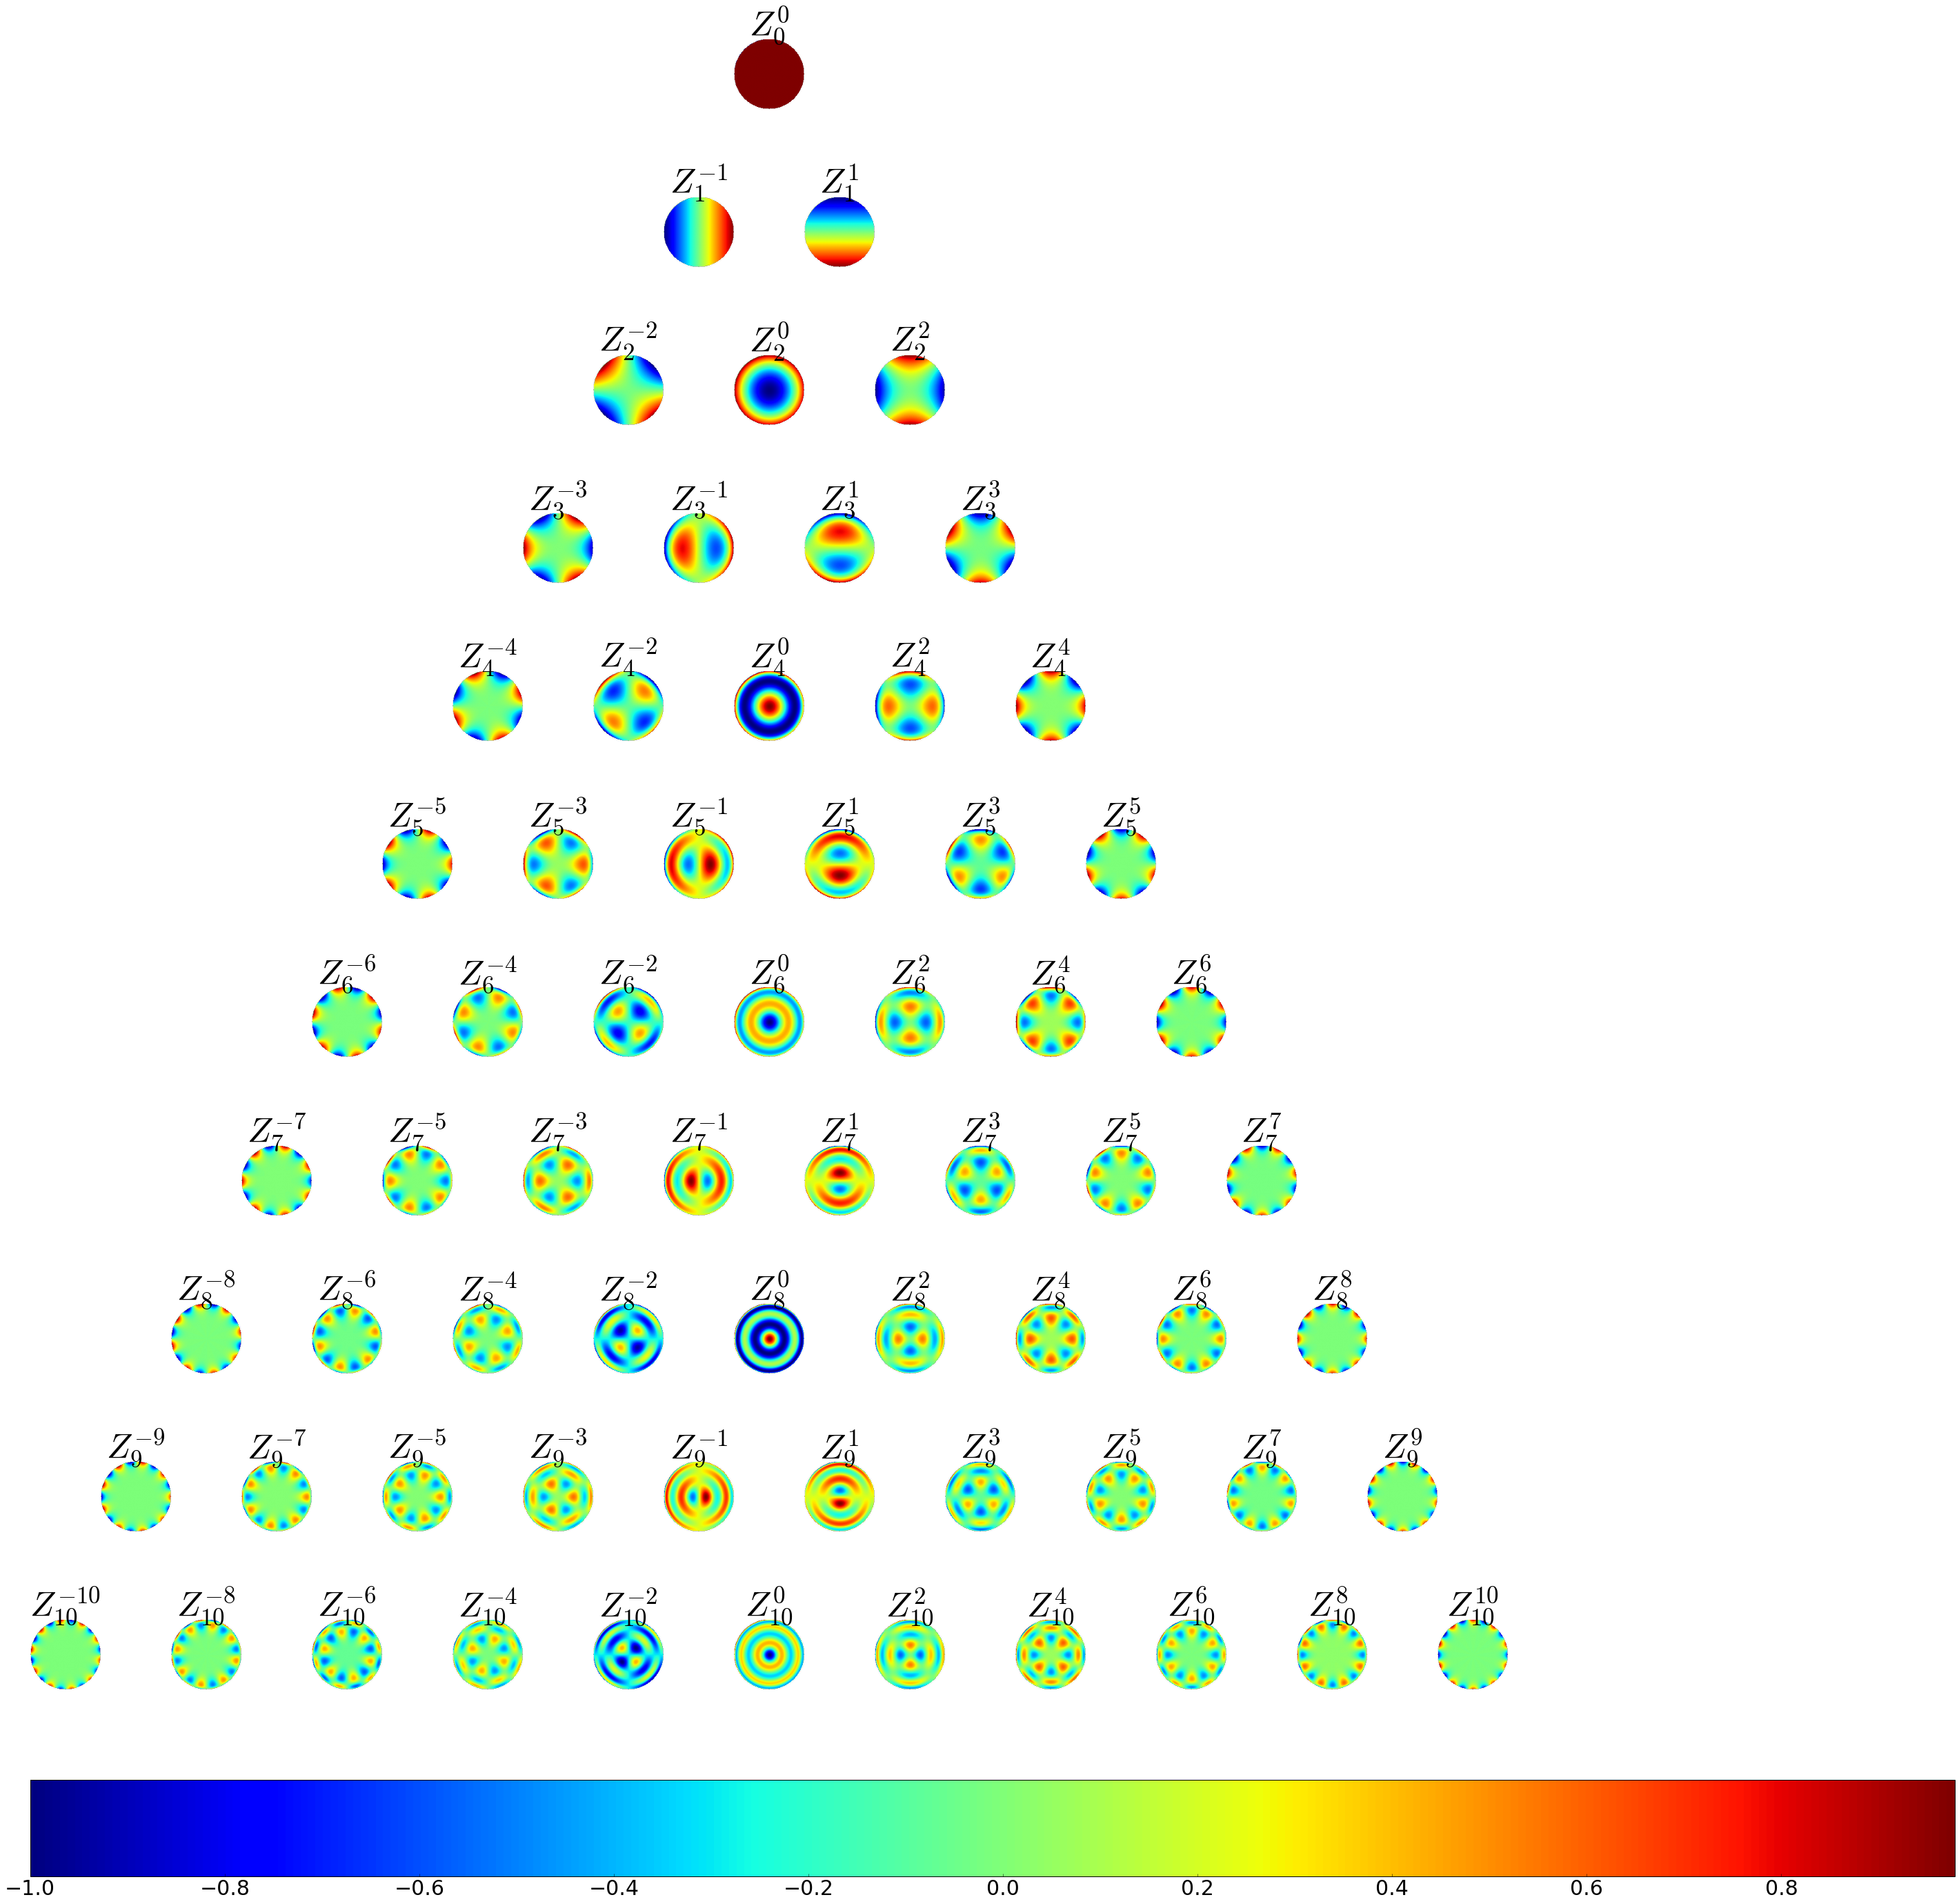

In [42]:
plot_zernikepyramid(norder=10, nside=128, figsize=(50, 50), fontsize=50, colorbar_labelsize=30)

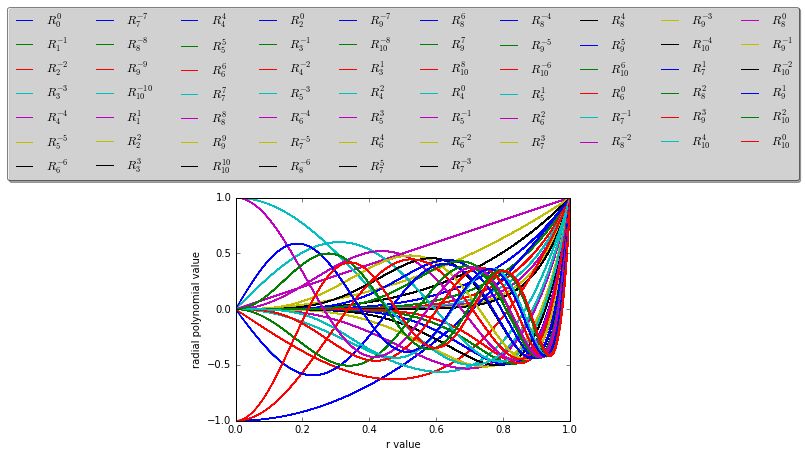

In [44]:
gen_radialpoly(norder=10, nside=128, legend_ncol=10)

In [ ]:
** Eg6: For radial order 20, we produce 3 basis::

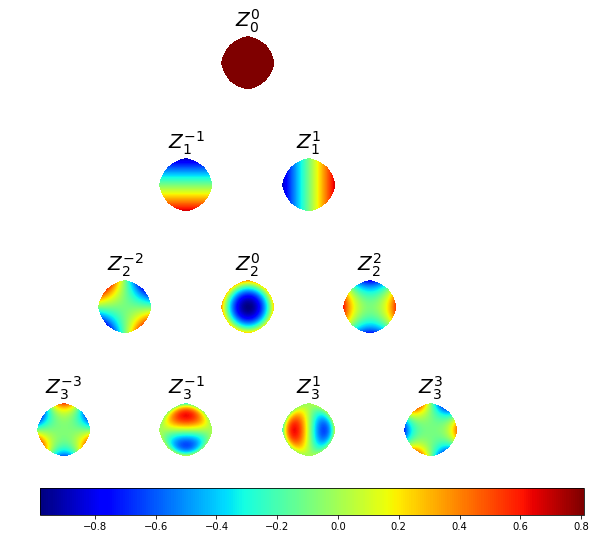

In [ ]:
plot_zernikepyramid(norder=3, nside=128, figsize=(10, 10))

### Generate Coefficients and Reconstruct image

In [3]:
def plot_reconstructed_image(image, norder=6, threshold=90):
        
        d = np.nan_to_num(image)
        coef = zernike_basis_n_coeffs(imgsrc = d, nlevels = norder, return_basis=False)
        trunc_coef = truncate(coef, threshold=threshold)
        Ncoeff = zernike_num_coeff(norder)
        cutoff = np.int(np.round(Ncoeff*threshold/100.))
        fig = plt.figure(1, figsize=(6,6))
        ax = fig.add_subplot(1,1,1)
        ax.semilogy(np.abs(coef),label="Full decomp (N=%s)"%Ncoeff)
        ax.semilogy(np.abs(trunc_coef),"ro",label="Truncated decomp (N=%s)"%cutoff)
        plt.legend(framealpha = 0.5)
        ax.set_title(r'List of coefficient sorted by decreasing energy')
        ax.set_xlabel(r'Sorted degree of decomposition')
        ax.set_ylabel(r'Abs(Coefficient amplitude)')
        
        # reconstructions
        print 'computing beam\'s reconstruction ....'
        approx_full = reconstruct_image(imgsrc=d, nlevels=norder, trunc_threshold=None)
        approx_trunc = reconstruct_image(imgsrc=d, nlevels=norder, trunc_threshold=threshold)

        Mmax=np.max([np.max(d),np.max(approx_full),np.max(approx_trunc)])
        mmin=np.min([np.min(d),np.min(approx_full),np.min(approx_trunc)])

        # differences
        print 'computing beams\' residuals ....'
        diffdatafull=(d-approx_full) 
        diffdatatrunc=(d - approx_trunc) 
        difffulltrunc=(approx_full-approx_trunc) 

        Mmaxdiff=np.max([np.max(diffdatafull),np.max(diffdatatrunc),np.max(difffulltrunc)])
        mmindiff=np.min([np.min(diffdatafull),np.min(diffdatatrunc),np.min(difffulltrunc)])

        
        axlist = []        
        fig = plt.figure(2, figsize=(12,9))
        ax = fig.add_subplot(2,3,1)
        axlist.append(ax)
        im = ax.imshow(circular_gridmask(d),interpolation="lanczos",vmax=Mmax,vmin=mmin) 
        ax.set_title(r'Data',fontsize=12)
        ax.axis('off')
        
        
        ax = fig.add_subplot(2,3,2)
        axlist.append(ax)
        im = ax.imshow(circular_gridmask(approx_full),interpolation="lanczos",vmax=Mmax,vmin=mmin)        
        ax.set_title(r'Full Recons (N=%s)'%Ncoeff,fontsize=12)
        ax.axis('off')

        ax = fig.add_subplot(2,3,3)
        axlist.append(ax)
        im = ax.imshow(circular_gridmask(approx_trunc),interpolation="lanczos",vmax=Mmax,vmin=mmin) 
        ax.set_title(r'Trunc Recons (N=%s)'%cutoff,fontsize=12)
        ax.axis('off')
        cbar = fig.colorbar(im, ax=axlist)      
        cbar.ax.tick_params(labelsize=10)        
    

        axlist = []
        ax = fig.add_subplot(2,3,4)
        axlist.append(ax)
        im = ax.imshow(circular_gridmask(diffdatafull),interpolation="lanczos",vmax=Mmaxdiff,vmin=mmindiff)
        ax.set_title(r'Data - Full Recons',fontsize=12)
        ax.axis('off')

        ax = fig.add_subplot(2,3,5)
        axlist.append(ax)
        im = ax.imshow(circular_gridmask(diffdatatrunc),interpolation="lanczos",vmax=Mmaxdiff,vmin=mmindiff)
        ax.set_title(r'Data - Trunc Recons (N=%s)'%Ncoeff,fontsize=12)
        ax.axis('off')

        ax = fig.add_subplot(2,3,6)
        axlist.append(ax)
        im = ax.imshow(circular_gridmask(difffulltrunc),interpolation="lanczos",vmax=Mmaxdiff,vmin=mmindiff,aspect='equal')
        ax.set_title(r'Full - Trunc (N=%s)'%cutoff,fontsize=12)
        ax.axis('off')
        cbar = fig.colorbar(im, ax=axlist)    
        cbar.ax.tick_params(labelsize=10)


computing beam's reconstruction ....
computing beams' residuals ....


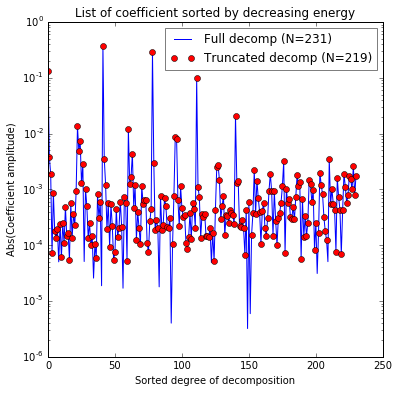

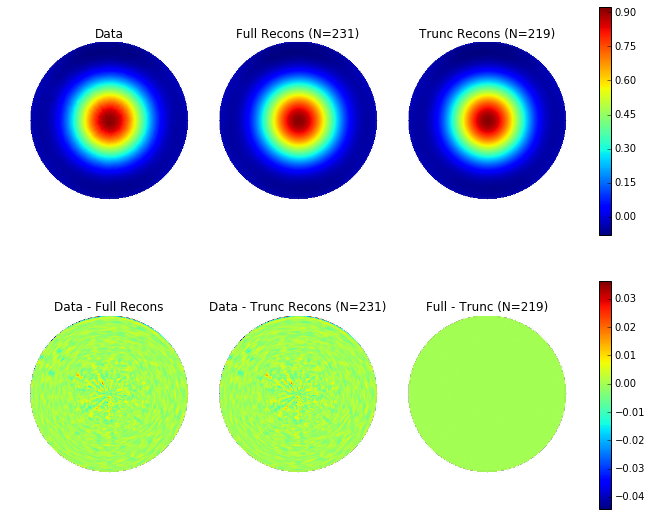

In [10]:
holod = np.load('1487813282_m000_900MHz_5MHz_140channels_Jones.npy')
hd = -holod[0,0,0].real
plot_reconstructed_image(image=hd, norder=20, threshold=95)

In [1]:
import mpl_toolkits.axes_grid1.axes_grid as axes_grid
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [15]:
def circular_mask(d):
    ny, nx = (d.shape[-2],d.shape[-1])
    c = ny/2-1
    ix, iy = np.meshgrid(np.arange(nx), np.arange(ny))
    distance = np.sqrt((ix - c)**2 + (iy - c)**2)
    d[:,:,distance>c] = np.nan
    return d


def plot2d_multi(d, sh=True, vrange=None, diameter=6, cbticks=None, cblabel='Power [dB]', title=''):
    
#    cm = plt.get_cmap('%s' %cmp) #'jet')#

    fig = plt.figure(1, figsize=(8,8))
    nrc = (d.shape[0], d.shape[1])
    ngrids = d.shape[0] * d.shape[1]
    extent = [-diameter/2, diameter/2, -diameter/2, diameter/2]
    g = axes_grid.ImageGrid(fig, 111, nrows_ncols=nrc, axes_pad=0.08, add_all=True,\
                            share_all=False, aspect=True, label_mode='1', cbar_mode='none')

    c = 0
    ims = []
    for i in range(d.shape[0]):
        for j in range(d.shape[1]):
            # Fix vmin, vmax and color bar ticks
            if vrange!=None:
                if i!=j: vmin, vmax = vrange[2], vrange[3]
                elif i==j: vmin, vmax = vrange[0], vrange[1]
            elif vrange==None: vmin, vmax, cticks = None, None, None

            im = g[c].imshow(d[i,j,:,:], extent=extent, origin='lower', cmap=plt.cm.cubehelix, vmin=vmin, vmax=vmax)
#             print i
#            cmap=plt.cm.nipy_spectral
            ims.append(im)

            # Color bar
            if ngrids==4: rights=[1,3]
            elif ngrids==16: rights=[3,7,11,15]
            if c in rights:
                cax = inset_axes(g[c], loc=5, width='5%', height='96%', bbox_to_anchor=(0.1,0,1,1), \
                    bbox_transform=g[c].transAxes)
                cb = plt.colorbar(im, cax=cax, orientation='vertical')
                if vrange != None: cb.set_ticks(range(vmin, vmax+1,5))
                cb.ax.xaxis.set_ticks_position('top')
                cb.ax.set_ylabel('Power [decibel]')

            # Ticks and circles
            g[c].set_ylabel('Angular distance [deg]')
            g[c].set_xlabel('Angular distance [deg]')
            cn, o = (extent[0]+extent[1])/2, abs(extent[0])/3.
            g[c].add_artist(plt.Circle((cn,cn), o*1, color='black', linestyle='dashed', fill=False))
            g[c].add_artist(plt.Circle((cn,cn), o*2, color='black', linestyle='dashed', fill=False))
            g[c].add_artist(plt.Circle((cn,cn), o*3, color='black', linestyle='dashed', fill=False))
            c += 1
    g[0].text(0,d.shape[3]+15, title, fontsize=13)

    fig.subplots_adjust(left=0.05,right=.87,bottom=-.13,top=1.1)
    if sh==True: plt.show(); plt.close()

### Fitting Zernike polynomials on MeerKAT Holography Beams

** Using radial Order of 20 which generates 231 coefficients

#### Using Data M00 channel 0

** Real part of Jones::

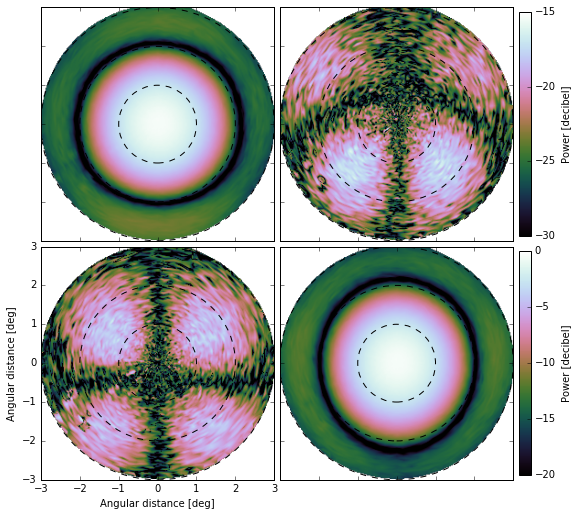

In [16]:
holod = np.load('1487813282_m000_900MHz_5MHz_140channels_Jones.npy')
hd = holod[0].real
plot2d_multi(10*np.log10(abs(hd)), diameter=6, vrange=[-20,0,-30,-15])

#### Using Data M00 channel 0

** Imaginary part of Jones::

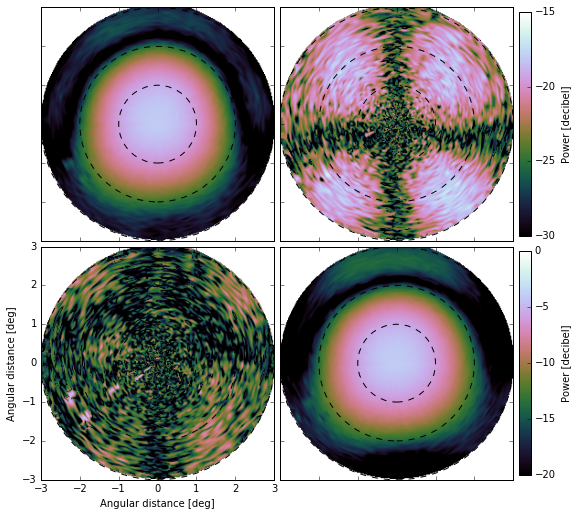

In [30]:
holod = np.load('1487813282_m000_900MHz_5MHz_140channels_Jones.npy')
hd = holod[0].imag
plot2d_multi(10*np.log10(abs(hd)), diameter=6, vrange=[-20,0,-30,-15])

#### Reconstructing M00

In [17]:
def reconstructed_image(image, norder=6, threshold=None):
    # reconstructions
    print 'computing beam\'s reconstruction ....'
    return reconstruct_image(imgsrc=image, nlevels=norder, trunc_threshold=None)

In [29]:
holod = np.load('1487813282_m000_900MHz_5MHz_140channels_Jones.npy')
hd = holod[0].real
appre = [reconstructed_image(image=hd[i,j,:,:], norder=20, threshold=None) for i in xrange(2) for j in xrange(2)]
hd = holod[0].imag
appim = [reconstructed_image(image=hd[i,j,:,:], norder=20, threshold=None) for i in xrange(2) for j in xrange(2)]

computing beam's reconstruction ....
computing beam's reconstruction ....
computing beam's reconstruction ....
computing beam's reconstruction ....
computing beam's reconstruction ....
computing beam's reconstruction ....
computing beam's reconstruction ....
computing beam's reconstruction ....


In [35]:
app = []

app.append([appre[0] + 1j*appim[0], appre[1] + 1j*appim[1] ])
app.append([appre[2] + 1j*appim[2], appre[3] + 1j*appim[3] ])
np.array(app).shape
pp = np.array(app)

/home/narh/tanvenvironment/tan_new_app/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


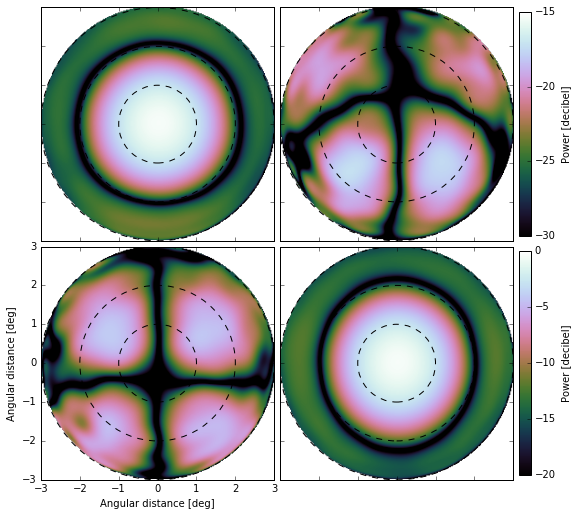

In [36]:
hd = pp.real
plot2d_multi(10*np.log10(abs(hd)), diameter=6, vrange=[-20,0,-30,-15])

/home/narh/tanvenvironment/tan_new_app/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


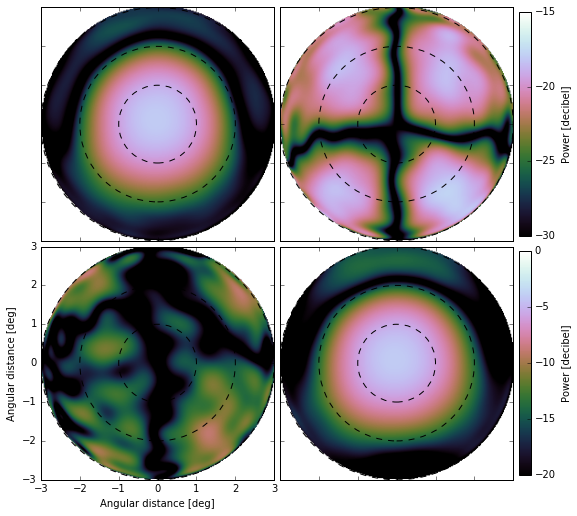

In [37]:
hd = pp.imag
plot2d_multi(10*np.log10(abs(hd)), diameter=6, vrange=[-20,0,-30,-15])

In [50]:
def jones2mueller(xx_real, xx_imag, xy_real, xy_imag, yx_real, yx_imag, yy_real, yy_imag):
        #
        '''
        Extracts the Jones components into XX, XY, YX, YY
        to produce Mueller components'''
        
        #
        #	Generating Jones Terms
        #
        xx = xx_real + 1j*xx_imag
        xy = xy_real + 1j*xy_imag
        yx = yx_real + 1j*yx_imag
        yy = yy_real + 1j*yy_imag
        
        M = []
        #    
        #  Generating Mueller Terms
        #   
        m_ii = 0.5*(xx*np.conjugate(xx) + xy*np.conjugate(xy) + yx*np.conjugate(yx) + yy*np.conjugate(yy))
        m_iq = 0.5*(xx*np.conjugate(yx) - xy*np.conjugate(xx) + yx*np.conjugate(yy) + yy*np.conjugate(xy)) 
        m_iu = 0.5*(xx*np.conjugate(xy) + xy*np.conjugate(xx) + yx*np.conjugate(yy)+ yy*np.conjugate(yx)) 
        m_iv = 0.5*1j*(xx*np.conjugate(xy) + yx*np.conjugate(yy) - xy*np.conjugate(xx) - yy*np.conjugate(yx))
        
        M.append([m_ii, m_iq, m_iu, m_iv])
        
        m_qi = 0.5*(xx*np.conjugate(yx) - xy*np.conjugate(xx) + yx*np.conjugate(yy) + yy*np.conjugate(xy))   
        m_qq = 0.5*(xx*np.conjugate(xx) - xy*np.conjugate(xy) - yx*np.conjugate(yx)+ yy*np.conjugate(yy)) 
        m_qu = 0.5*(xx*np.conjugate(xy) + xy*np.conjugate(xx) - yx*np.conjugate(yy) - yy*np.conjugate(yx)) 
        m_qv = 0.5*1j*(xx*np.conjugate(xy) - yx*np.conjugate(yy) - xy*np.conjugate(xx) - yy*np.conjugate(yx))
        
        M.append([m_qi, m_qq, m_qu, m_qv])
        
        m_ui = 0.5*(xx*np.conjugate(xy) + xy*np.conjugate(xx) + yx*np.conjugate(yy)+ yy*np.conjugate(yx))
        m_uq = 0.5*(xx*np.conjugate(xy) + xy*np.conjugate(xx) - yx*np.conjugate(yy) - yy*np.conjugate(yx))  
        m_uu = 0.5*(xx*np.conjugate(yy) + yy*np.conjugate(xx) + xy*np.conjugate(yx)+ yx*np.conjugate(xy))         
        m_uv = 0.5*1j*(xx*np.conjugate(yy) - yy*np.conjugate(xx) - xy*np.conjugate(yx) - xy*np.conjugate(xy))
        
        M.append([m_ui, m_uq, m_uu, m_uv])
        
        m_vi = 0.5*1j*(xx*np.conjugate(xy) + yx*np.conjugate(yy) - xy*np.conjugate(xx) - yy*np.conjugate(yx))  
        m_vq = 0.5*1j*(xx*np.conjugate(xy) - yx*np.conjugate(yy) - xy*np.conjugate(xx) - yy*np.conjugate(yx))       
        m_vu = 0.5*1j*(-xx*np.conjugate(yy) + yy*np.conjugate(xx) - xy*np.conjugate(yx) + xy*np.conjugate(xy))    
        m_vv = 0.5*(xx*np.conjugate(yy) - yx*np.conjugate(xy) + yy*np.conjugate(xx) - xy*np.conjugate(yx))
        M.append([m_vi, m_vq, m_vu, m_vv])
        #
        
        return   np.array(M)  

## Mueller matrix of Original Data

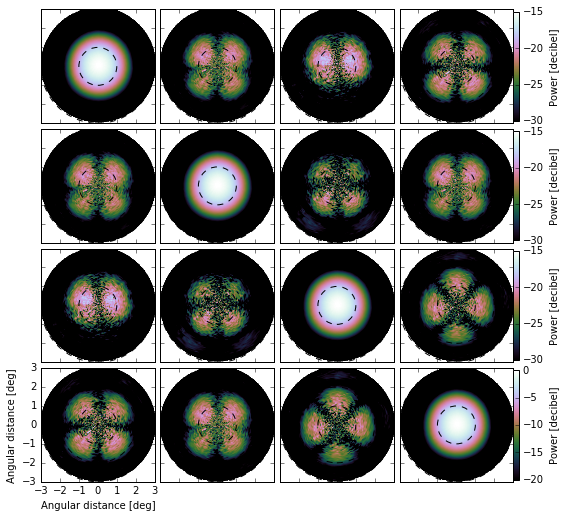

In [51]:
holod = np.load('1487813282_m000_900MHz_5MHz_140channels_Jones.npy')
hd = holod[0]
xx_real = hd[0,0,:,:].real
xx_imag = hd[0,0,:,:].imag
xy_real = hd[0,1,:,:].real
xy_imag = hd[0,1,:,:].imag
yx_real = hd[1,0,:,:].real
yx_imag = hd[1,0,:,:].imag
yy_real = hd[1,1,:,:].real
yy_imag = hd[1,1,:,:].imag

original_beam = jones2mueller(xx_real, xx_imag, xy_real, xy_imag, yx_real, yx_imag, yy_real, yy_imag)
plot2d_multi(10*np.log10(abs(original_beam)), diameter=6, vrange=[-20,0,-30,-15])

## Mueller matrix of Reconstructed Beam

In [47]:
xx_real = appre[0]
xx_imag = appim[0]
xy_real = appre[1]
xy_imag = appim[1]
yx_real = appre[2]
yx_imag = appim[2]
yy_real = appre[3]
yy_imag = appim[3]

W = jones2mueller(xx_real, xx_imag, xy_real, xy_imag, yx_real, yx_imag, yy_real, yy_imag)

In [48]:
W.shape

(4, 4, 256, 256)

/home/narh/tanvenvironment/tan_new_app/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


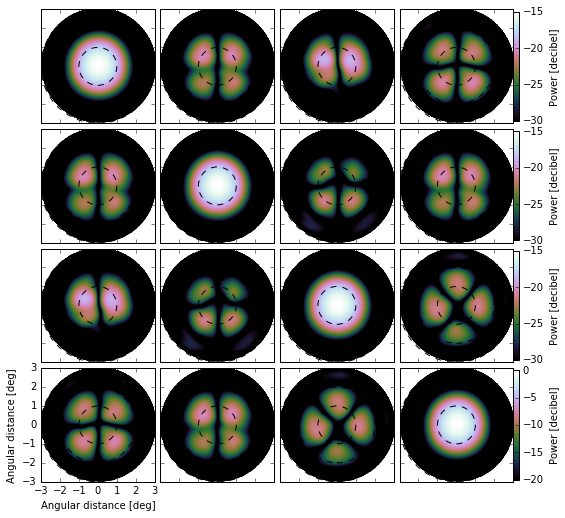

In [49]:
plot2d_multi(10*np.log10(abs(W)), diameter=6, vrange=[-20,0,-30,-15])

/home/narh/tanvenvironment/tan_new_app/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


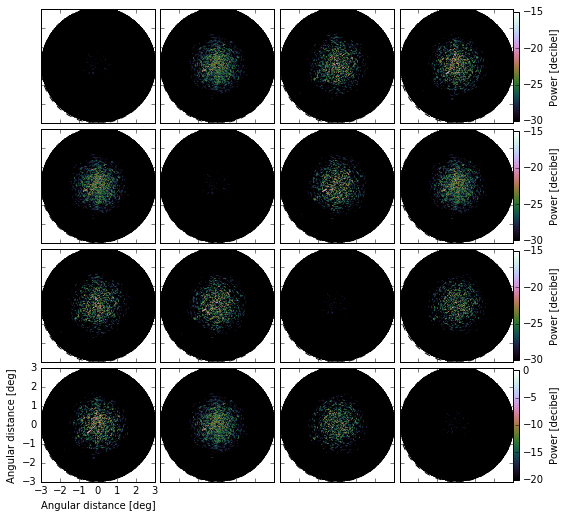

In [53]:
diff = np.nan_to_num(original_beam) - W
plot2d_multi(10*np.log10(abs(diff)), diameter=6, vrange=[-20,0,-30,-15])